In [1]:
import pymongo as pmg
import pandas as pd
import datetime as dt
import pymysql
import matplotlib.pyplot as plt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.dates as mdate
from datetime import time
from KRData.HKData import HKFuture
import configparser
import talib as tb

In [3]:
df1=pd.read_pickle("pkl/hsi.pkl")
df1.head()

,datetime,code,open,high,low,close,MACD,MACD1,MACD2,MA30,MA60,CHG,STD60,STD1,DIFF,DEA
datetime,,,,,,,,,,,,,,,,
2014-01-02 09:15:00,2014-01-02 09:15:00,HSI1401,23414.0,23416.0,23370.0,23376.0,NaN,NaN,NaN,NaN,NaN,-38.0,NaN,NaN,NaN,NaN
2014-01-02 09:16:00,2014-01-02 09:16:00,HSI1401,23376.0,23394.0,23360.0,23394.0,NaN,NaN,NaN,NaN,NaN,18.0,NaN,NaN,NaN,NaN
2014-01-02 09:17:00,2014-01-02 09:17:00,HSI1401,23395.0,23444.0,23391.0,23431.0,NaN,NaN,NaN,NaN,NaN,36.0,NaN,NaN,NaN,NaN
2014-01-02 09:18:00,2014-01-02 09:18:00,HSI1401,23432.0,23435.0,23419.0,23423.0,NaN,NaN,NaN,NaN,NaN,-9.0,NaN,NaN,NaN,NaN
2014-01-02 09:19:00,2014-01-02 09:19:00,HSI1401,23426.0,23426.0,23390.0,23401.0,NaN,NaN,NaN,NaN,NaN,-25.0,NaN,NaN,NaN,NaN


In [4]:
time1=dt.time(9,15,0)
time2=dt.time(16,30,0)


,datetime,code,open,high,low,close,MACD,MACD1,MACD2,MA30,MA60,CHG,STD60,STD1,DIFF,DEA
datetime,,,,,,,,,,,,,,,,
2019-01-03 00:00:00,2019-01-03 00:00:00,HSI1901,25256.0,25266.0,25243.0,25249.0,8.298173,8.992252,-0.694079,25227.110698,25209.487715,-7.0,9.622009,-0.727499,8.992252,-0.694079
2019-01-03 00:01:00,2019-01-03 00:01:00,HSI1901,25247.0,25252.0,25242.0,25242.0,5.554441,8.304690,-2.750249,25228.071298,25210.553692,-5.0,9.641044,-0.518616,8.304690,-2.750249
2019-01-03 00:02:00,2019-01-03 00:02:00,HSI1901,25241.0,25249.0,25239.0,25249.0,4.575067,7.558765,-2.983698,25229.421537,25211.814227,8.0,9.614962,0.832037,7.558765,-2.983698
2019-01-03 00:03:00,2019-01-03 00:03:00,HSI1901,25251.0,25256.0,25246.0,25252.0,4.177641,6.882540,-2.704900,25230.878212,25213.131793,1.0,9.603978,0.104124,6.882540,-2.704900
2019-01-03 00:04:00,2019-01-03 00:04:00,HSI1901,25251.0,25260.0,25251.0,25260.0,4.808750,6.467782,-1.659032,25232.757037,25214.668456,9.0,9.492263,0.948141,6.467782,-1.659032
2019-01-03 00:05:00,2019-01-03 00:05:00,HSI1901,25261.0,25280.0,25261.0,25280.0,7.616179,6.697462,0.918717,25235.804970,25216.810473,19.0,9.577172,1.983884,6.697462,0.918717
2019-01-03 00:06:00,2019-01-03 00:06:00,HSI1901,25280.0,25298.0,25269.0,25298.0,11.351826,7.628335,3.723491,25239.817552,25219.472425,18.0,9.699298,1.855804,7.628335,3.723491
2019-01-03 00:07:00,2019-01-03 00:07:00,HSI1901,25298.0,25302.0,25289.0,25298.0,13.110653,8.724798,4.385855,25243.571259,25222.047100,0.0,9.695059,0.000000,8.724798,4.385855
2019-01-03 00:08:00,2019-01-03 00:08:00,HSI1901,25294.0,25308.0,25293.0,25306.0,14.652333,9.910305,4.742028,25247.598919,25224.799654,12.0,9.694156,1.237859,9.910305,4.742028


In [51]:
def CalcMa60(date):
    time1=dt.time(9,15,0)
    time2=dt.time(16,30,0)
#     date='2019-01-03'
    f1=df1[str(date)]
    cont1=(f1.index.time>=time1)&(f1.index.time<=time2)
    res=[]
    rec={}
    state=0
    cont={}
    cnt=0
    for i,row in f1[cont1].iterrows():
        cont['over']=row['close']>row['MA60'] and state in[0,2]
        cont['under']=row['close']<row['MA60'] and state in[0,1]
        cnt+=1
        if cont['over']:
            if state==2:
                rec['close']=row['close']
                rec['diff']=rec['open']-rec['close']
                rec['cnt']=cnt
                cnt=0
                state=3
                #             print(rec)
                res.append(rec)
                rec={}
            state=1
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=1
        elif cont['under'] :
            if state==1:
                rec['close']=row['close']
                rec['diff']=rec['close']-rec['open']
                rec['cnt']=cnt
                cnt=0
                sate=4
    #             print(rec)
                res.append(rec)
                rec={}
            state=2
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=2
    if state==1:
        rec['close']=row['close']
        rec['diff']=rec['close']-rec['open']
        rec['cnt']=cnt
        res.append(rec)
    #     print(rec)
    elif state==2:
        rec['close']=row['close']
        rec['diff']=rec['open']-rec['close']
        rec['cnt']=cnt
        res.append(rec)
    return res
#     print(rec)

In [42]:

pd.DataFrame(CalcMa60('2019/1/3'))


,begin,close,cnt,diff,open,state
0,2019-01-03 09:15:00,25131.0,34,-47.0,25084.0,2
1,2019-01-03 09:48:00,25150.0,36,19.0,25131.0,1
2,2019-01-03 10:24:00,25167.0,4,-17.0,25150.0,2
3,2019-01-03 10:28:00,25158.0,1,-9.0,25167.0,1
4,2019-01-03 10:29:00,25170.0,1,-12.0,25158.0,2
5,2019-01-03 10:30:00,25158.0,1,-12.0,25170.0,1
6,2019-01-03 10:31:00,25174.0,1,-16.0,25158.0,2
7,2019-01-03 10:32:00,25146.0,3,-28.0,25174.0,1
8,2019-01-03 10:35:00,25163.0,2,-17.0,25146.0,2
9,2019-01-03 10:37:00,25162.0,7,-1.0,25163.0,1


In [52]:
dList=df1.datetime.dt.date.unique()
Result=[]
for dd in dList:
    print(dd)
    res=CalcMa60(dd)
    for a in res:
        Result.append(a)


2014-01-02
2014-01-03
2014-01-06
2014-01-07
2014-01-08
2014-01-09
2014-01-10
2014-01-13
2014-01-14
2014-01-15
2014-01-16
2014-01-17
2014-01-20
2014-01-21
2014-01-22
2014-01-23
2014-01-24
2014-01-27
2014-01-28
2014-01-29
2014-01-30
2014-02-04
2014-02-05
2014-02-06
2014-02-07
2014-02-10
2014-02-11
2014-02-12
2014-02-13
2014-02-14
2014-02-17
2014-02-18
2014-02-19
2014-02-20
2014-02-21
2014-02-24
2014-02-25
2014-02-26
2014-02-27
2014-02-28
2014-03-03
2014-03-04
2014-03-05
2014-03-06
2014-03-07
2014-03-10
2014-03-11
2014-03-12
2014-03-13
2014-03-14
2014-03-17
2014-03-18
2014-03-19
2014-03-20
2014-03-21
2014-03-24
2014-03-25
2014-03-26
2014-03-27
2014-03-28
2014-03-31
2014-04-01
2014-04-02
2014-04-03
2014-04-04
2014-04-07
2014-04-08
2014-04-09
2014-04-10
2014-04-11
2014-04-14
2014-04-15
2014-04-16
2014-04-17
2014-04-22
2014-04-23
2014-04-24
2014-04-25
2014-04-28
2014-04-29
2014-04-30
2014-05-02
2014-05-05
2014-05-07
2014-05-08
2014-05-09
2014-05-12
2014-05-13
2014-05-14
2014-05-15
2014-05-16

2017-01-11
2017-01-12
2017-01-13
2017-01-16
2017-01-17
2017-01-18
2017-01-19
2017-01-20
2017-01-23
2017-01-24
2017-01-25
2017-01-26
2017-01-27
2017-02-01
2017-02-02
2017-02-03
2017-02-06
2017-02-07
2017-02-08
2017-02-09
2017-02-10
2017-02-13
2017-02-14
2017-02-15
2017-02-16
2017-02-17
2017-02-20
2017-02-21
2017-02-22
2017-02-23
2017-02-24
2017-02-27
2017-02-28
2017-03-01
2017-03-02
2017-03-03
2017-03-06
2017-03-07
2017-03-08
2017-03-09
2017-03-10
2017-03-13
2017-03-14
2017-03-15
2017-03-16
2017-03-17
2017-03-20
2017-03-21
2017-03-22
2017-03-23
2017-03-24
2017-03-27
2017-03-28
2017-03-29
2017-03-30
2017-03-31
2017-04-03
2017-04-05
2017-04-06
2017-04-07
2017-04-10
2017-04-11
2017-04-12
2017-04-13
2017-04-18
2017-04-19
2017-04-20
2017-04-21
2017-04-24
2017-04-25
2017-04-26
2017-04-27
2017-04-28
2017-05-02
2017-05-04
2017-05-05
2017-05-08
2017-05-09
2017-05-10
2017-05-11
2017-05-12
2017-05-15
2017-05-16
2017-05-17
2017-05-18
2017-05-19
2017-05-22
2017-05-23
2017-05-24
2017-05-25
2017-05-26

In [69]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)
R1['diff'].agg(Calc)
R1['Date']=R1.begin.apply(lambda x:x.date())
R2=R1.groupby('Date')['diff'].agg(Calc)
R2.sort_values('sum')

,sum,count,mean,max,min,std
Date,,,,,,
2018-04-06,-593.0,38,-15.605263,78.0,-90.0,29.466921
2018-03-02,-576.0,47,-12.255319,25.0,-51.0,11.235557
2018-03-23,-538.0,31,-17.354839,141.0,-165.0,49.693426
2019-03-01,-536.0,50,-10.720000,44.0,-67.0,19.168469
2018-07-23,-531.0,45,-11.800000,77.0,-94.0,25.579288
2019-01-11,-525.0,57,-9.210526,30.0,-66.0,15.078055
2015-07-31,-518.0,45,-11.511111,48.0,-85.0,19.298637
2018-03-16,-506.0,44,-11.500000,64.0,-60.0,21.532561
2015-09-21,-503.0,49,-10.265306,47.0,-79.0,16.566502


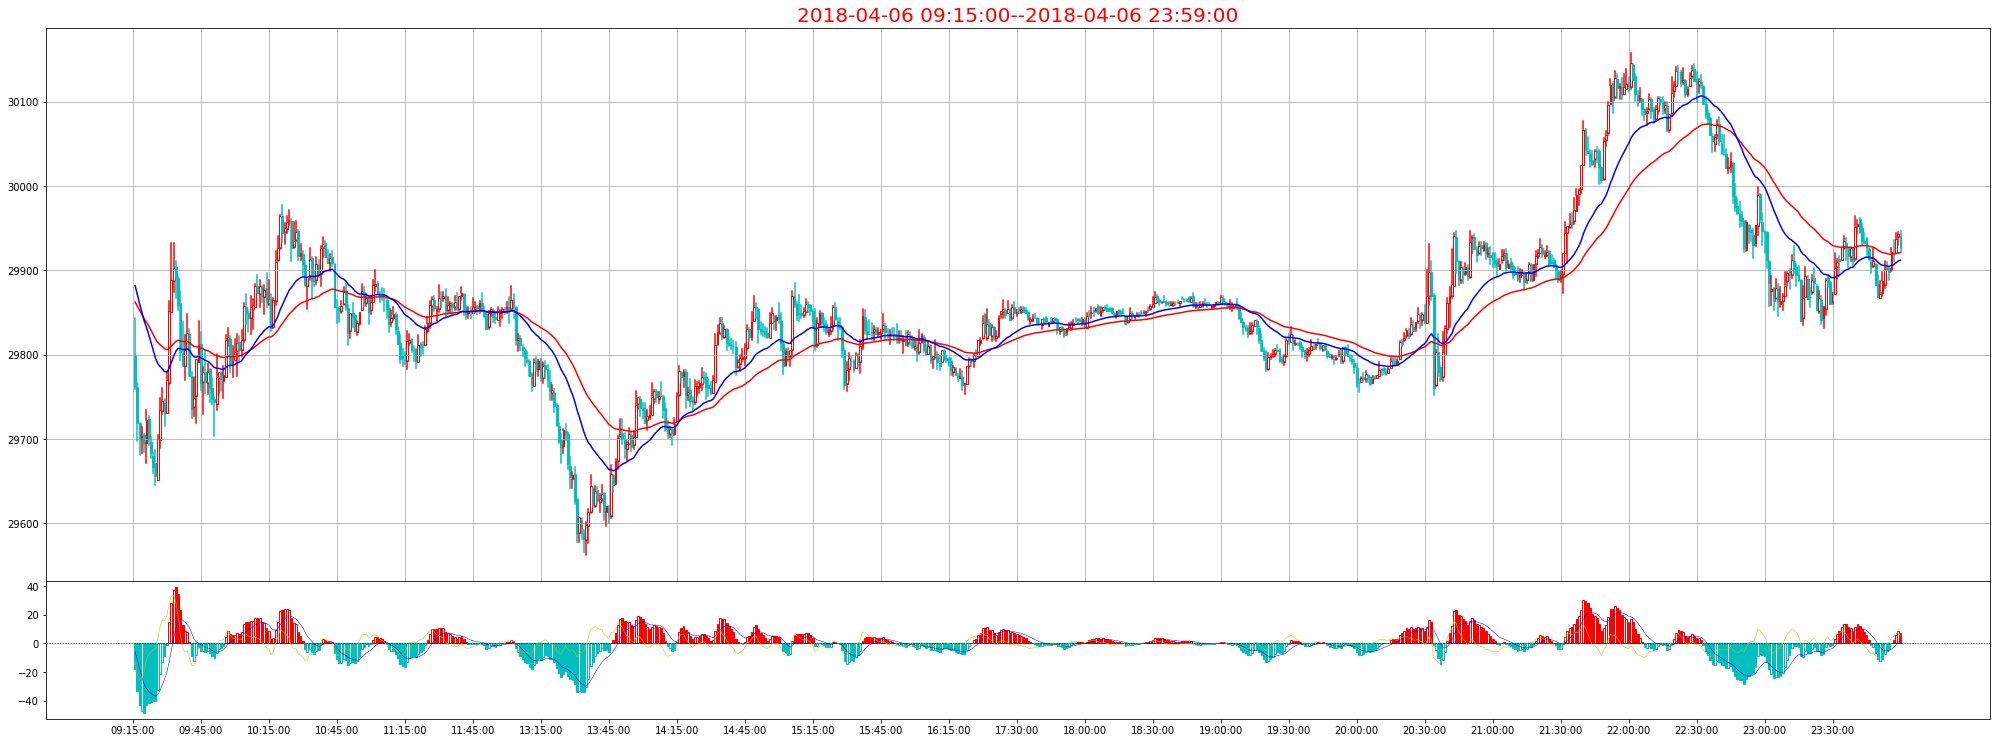

In [71]:
from kline import Kline as KK
K1=KK()
date='2018/4/6'
dd=df1[date]
K1.DrawKline(dd)